# ШАПКА

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# ЗАДАНИЕ №1



In [6]:
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
from sklearn.datasets import load_boston
boston = load_boston()
data = boston["data"]

In [20]:
#Создайте датафреймы X и y из этих данных.
feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
target = boston["target"]
Y = pd.DataFrame(target, columns = ["price"])
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [23]:
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split, с параметрами test_size 0.2, random_state 42)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [25]:
#Масштабируйте данные с помощью StandardScaler.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [26]:
#Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

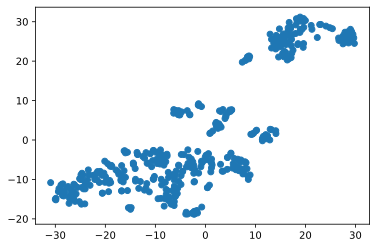

In [27]:
#Постройте диаграмму рассеяния на этих данных.
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

# ЗАДАНИЕ №2

In [29]:
#импорт KMeans
from sklearn.cluster import KMeans

In [34]:
#разбить данные из тренировочного набора на 3 кластера, использовать признаки из X_train
model = KMeans(n_clusters = 3, random_state = 42, max_iter = 100)
labels_train = model.fit_predict(X_train_scaled)

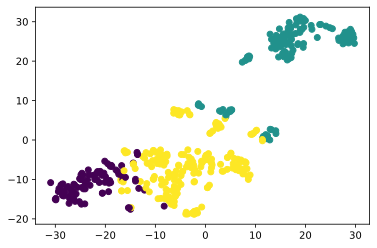

In [35]:
#Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [44]:
#средние значения price в кластерах
print('1-', Y_train.price[labels_train == 0].mean())
print('2-', Y_train.price[labels_train == 1].mean())
print('3-', Y_train.price[labels_train == 2].mean())

1- 27.78837209302326
2- 16.165354330708663
3- 24.958115183246072


In [43]:
##средние значения CRIM в кластерах
print('1-', X_train.CRIM[labels_train == 0].mean())
print('2-', X_train.CRIM[labels_train == 1].mean())
print('3-', X_train.CRIM[labels_train == 2].mean())

1- 0.07356558139534884
2- 10.797028425196851
3- 0.4216602094240837


# ЗАДАНИЕ №3

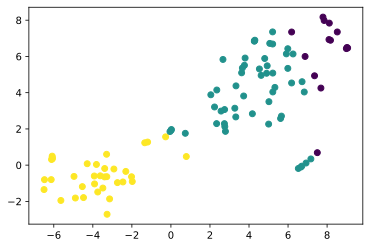

In [51]:
#Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = model.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()


In [56]:
#средние значения price в кластерах в тестовых данных
print('1-', Y_test.price[labels_test == 0].mean())
print('2-', Y_test.price[labels_test == 1].mean())
print('3-', Y_test.price[labels_test == 2].mean())

1- 33.871428571428574
2- 21.552830188679245
3- 16.43714285714286


In [55]:
#средние значения CRIM в кластерах в тестовых данных
print('1-', X_test.CRIM[labels_test == 0].mean())
print('2-', X_test.CRIM[labels_test == 1].mean())
print('3-', X_test.CRIM[labels_test == 2].mean())

1- 0.08618571428571427
2- 0.25200716981132076
3- 10.165531142857143
